In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('drive/MyDrive/Colab Notebooks/amazon_laptop_prices_v01.csv')
data.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
myLabel = LabelEncoder()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = myLabel.fit_transform(data[col])
data.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,35,1083,18,21,3,100,16,31,188,19,48,3,NaN,1425
1,18,1083,25,150,3,96,14,35,51,19,48,60,4.5,1857
2,29,951,26,34,41,107,8,32,188,6,209,10,5.0,434
3,4,682,13,150,19,139,16,3,51,19,209,60,4.8,1521
4,4,682,23,101,19,139,16,3,188,19,209,60,4.8,109


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   int64  
 1   model                 4446 non-null   int64  
 2   screen_size           4446 non-null   int64  
 3   color                 4446 non-null   int64  
 4   harddisk              4446 non-null   int64  
 5   cpu                   4446 non-null   int64  
 6   ram                   4446 non-null   int64  
 7   OS                    4446 non-null   int64  
 8   special_features      4446 non-null   int64  
 9   graphics              4446 non-null   int64  
 10  graphics_coprocessor  4446 non-null   int64  
 11  cpu_speed             4446 non-null   int64  
 12  rating                2174 non-null   float64
 13  price                 4446 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 486.4 KB


In [8]:
data.isnull().sum()

brand                      0
model                      0
screen_size                0
color                      0
harddisk                   0
cpu                        0
ram                        0
OS                         0
special_features           0
graphics                   0
graphics_coprocessor       0
cpu_speed                  0
rating                  2272
price                      0
dtype: int64

In [9]:
data['rating'].fillna(data['rating'].mean(), inplace=True)

In [10]:
data.isnull().sum()

brand                   0
model                   0
screen_size             0
color                   0
harddisk                0
cpu                     0
ram                     0
OS                      0
special_features        0
graphics                0
graphics_coprocessor    0
cpu_speed               0
rating                  0
price                   0
dtype: int64

In [11]:
y = data['price'].values
X = data.drop('price', axis=1).values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
linearModel.score(X_test, y_test)

0.3222661215000244

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              14000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 640,001
Trainable params: 640,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
72/72 [==============================] - 4s 32ms/step - loss: 455630.6250 - mae: 564.6954 - val_loss: 284082.5625 - val_mae: 440.8040
Epoch 2/500
72/72 [=================

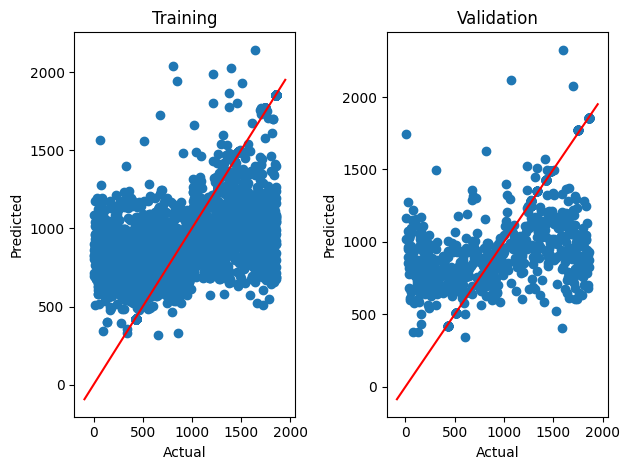

In [16]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=500,
                    batch_size=50,
                    callbacks=[es],
                    verbose=1)
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
# history_dict = history.history
# loss_values = history_dict['loss'] # you can change this
# val_loss_values = history_dict['val_loss'] # you can also change this
# epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
# plt.plot(epochs, loss_values, 'bo', label='Training loss')
# plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
plt.show()